# Analysis of Political Blogs  
Aaron Palumbo | Partha Banerjee
Sept. 27, 2015

## Assignment:

Week 4 Assignment

Centrality measures can be used to predict (positive or negative) outcomes for a node.

Your task in this week’s assignment is to identify an interesting set of network data that is available on the web (either through web scraping or web APIs) that could be used for analyzing and comparing centrality measures across nodes.  As an additional constraint, there should be at least one categorical variable available for each node (such as “Male” or “Female”; “Republican”, “Democrat,” or “Undecided”, etc.)

In addition to identifying your data source, you should create a high level plan that describes how you would load the data for analysis, and describe a hypothetical outcome that could be predicted from comparing degree centrality across categorical groups. 

For this week’s assignment, you are not required to actually load or analyze the data.  Please see also Project 1 below.

You may work in a small group on the assignment.   You should post your document to GitHub by end of day on Sunday September 20th.


## Data

Political blogs: A directed network of hyperlinks between weblogs on US politics, recorded in 2005 by Adamic and Glance. Please cite L. A. Adamic and N. Glance, "The political blogosphere and the 2004 US Election", in Proceedings of the WWW-2005 Workshop on the Weblogging Ecosystem (2005). Thanks to Lada Adamic for permission to post these data on this web site. 

From <http://www-personal.umich.edu/~mejn/netdata/> 

---

From the data dictionary:

Political blogosphere Feb. 2005
Data compiled by Lada Adamic and Natalie Glance

Node "value" attributes indicate political leaning according to:

  0 (left or liberal)
  1 (right or conservative)

Data on political leaning comes from blog directories as indicated.  Some
blogs were labeled manually, based on incoming and outgoing links and posts
around the time of the 2004 presidential election.  Directory-derived
labels are prone to error; manual labels even more so.

Links between blogs were automatically extracted from a crawl of the front
page of the blog.

These data should be cited as Lada A. Adamic and Natalie Glance, "The
political blogosphere and the 2004 US Election", in Proceedings of the
WWW-2005 Workshop on the Weblogging Ecosystem (2005).


In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import IPython.display as dis

%matplotlib inline

In [ ]:
dg = nx.read_gml("polblogs/polblogs.gml")

In [27]:
# We're going to turn this into an undirected graph
g = dg.to_undirected()

## Analysis

First we check to see how large our graph is.

In [4]:
len(g)

1490

1490 isn't too big. We can go ahead and calculate the in-degree measure of centrality on each node and take a look at the top 10.

In [35]:
d = nx.degree(g)

def sorted_map(map):
    ms = sorted(map.iteritems(), key=lambda (k, v): (-v, k))
    return ms

ds = sorted_map(d)

for (i, j) in ds[0:9]:
    print g.node[i]

{'source': u'LeftyDirectory,LabeledManually,CampaignLine', 'id': 155, 'value': 0, 'label': u'dailykos.com'}
{'source': u'BlogPulse', 'id': 1051, 'value': 1, 'label': u'instapundit.com'}
{'source': u'BlogPulse,CampaignLine', 'id': 855, 'value': 1, 'label': u'blogsforbush.com'}
{'source': u'BlogPulse,LeftyDirectory,CampaignLine', 'id': 55, 'value': 0, 'label': u'atrios.blogspot.com'}
{'source': u'BlogPulse,LeftyDirectory', 'id': 641, 'value': 0, 'label': u'talkingpointsmemo.com'}
{'source': u'LabeledManually', 'id': 963, 'value': 1, 'label': u'drudgereport.com'}
{'source': u'BlogPulse', 'id': 1245, 'value': 1, 'label': u'powerlineblog.com'}
{'source': u'BlogPulse,LeftyDirectory', 'id': 729, 'value': 0, 'label': u'washingtonmonthly.com'}
{'source': u'BlogPulse', 'id': 1153, 'value': 1, 'label': u'michellemalkin.com'}


We can also load this dataset into Gephi, which is an easy way to visualize what we have.

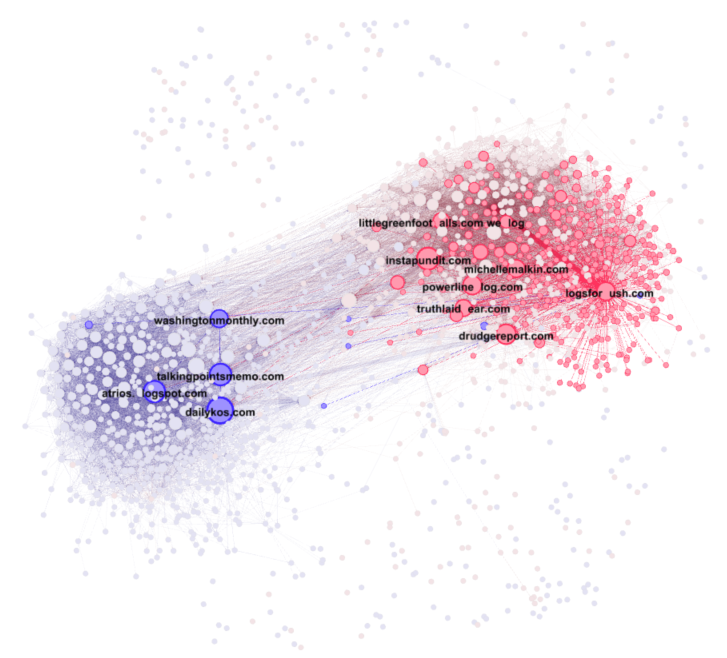

In [7]:
dis.Image('in_degree.png')

We can see in the graph above that there appears to be one large component with two clusters, and many islands. Let's remove those islands before we move on.

ref: http://stackoverflow.com/questions/20012579/is-there-an-easy-way-to-prune-disconnected-networks-in-a-networkx-graph

In [28]:
def prune_islands(g):
    if not nx.is_connected(g):
        # get a list of unconnected networks
        sub_graphs = list(nx.connected_component_subgraphs(g))
        
        largest_sub = sub_graphs[0]
        
        # find the largest network in the list
        for sg in sub_graphs:
            if len(sg.nodes()) > len(largest_sub.nodes()):
                largest_sub = sg
        
        g = largest_sub
    return g

In [36]:
g = prune_islands(g)
d = nx.degree(g)
ds = sorted_map(d)

for (i, j) in ds[0:9]:
    print g.node[i]

{'source': u'LeftyDirectory,LabeledManually,CampaignLine', 'id': 155, 'value': 0, 'label': u'dailykos.com'}
{'source': u'BlogPulse', 'id': 1051, 'value': 1, 'label': u'instapundit.com'}
{'source': u'BlogPulse,CampaignLine', 'id': 855, 'value': 1, 'label': u'blogsforbush.com'}
{'source': u'BlogPulse,LeftyDirectory,CampaignLine', 'id': 55, 'value': 0, 'label': u'atrios.blogspot.com'}
{'source': u'BlogPulse,LeftyDirectory', 'id': 641, 'value': 0, 'label': u'talkingpointsmemo.com'}
{'source': u'LabeledManually', 'id': 963, 'value': 1, 'label': u'drudgereport.com'}
{'source': u'BlogPulse', 'id': 1245, 'value': 1, 'label': u'powerlineblog.com'}
{'source': u'BlogPulse,LeftyDirectory', 'id': 729, 'value': 0, 'label': u'washingtonmonthly.com'}
{'source': u'BlogPulse', 'id': 1153, 'value': 1, 'label': u'michellemalkin.com'}


I don't really follow the blogging scene, but some Internet searches seem to indicate these are very popular blogs - except for blogsforbush.com, which I suspect was popular at the time of the data collection but now seems defunct.

Now we want to compare the centrality measure between left and right leaning blogs:

1 = conservative (red)  
0 = liberal (blue)  

To do this we start by comparing a histogram of the two groups.

<function matplotlib.pyplot.show>

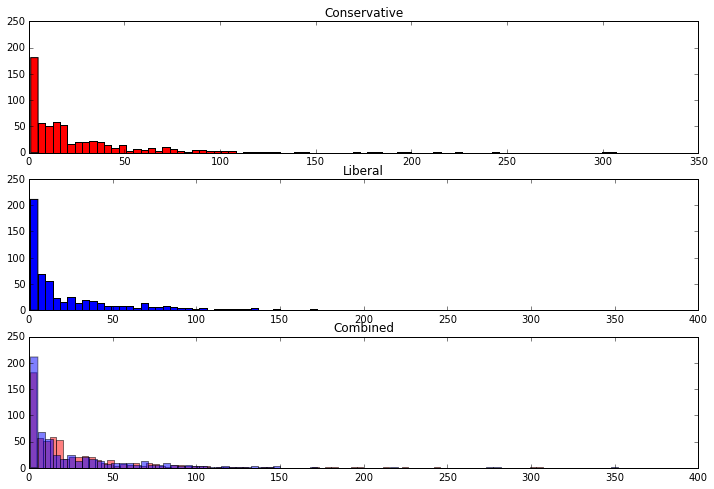

In [31]:
b = 80
maxy = 250
fig, ax = plt.subplots(3, 1, figsize=(12, 8))
ax[0].hist([j for (i, j) in ds if g.node[i]['value'] == 1], 
           bins=b, color='red')
ax[0].set_ylim([0, maxy])
ax[0].set_title("Conservative")

ax[1].hist([j for (i, j) in ds if g.node[i]['value'] == 0], 
           bins=b, color='blue')
ax[1].set_ylim([0, maxy])
ax[1].set_title("Liberal")

ax[2].hist([j for (i, j) in ds if g.node[i]['value'] == 1], 
           bins=b, color='red', alpha=0.5)
ax[2].hist([j for (i, j) in ds if g.node[i]['value'] == 0], 
           bins=b, color='blue', alpha=0.5)
ax[2].set_ylim([0, maxy])
ax[2].set_title("Combined")

plt.show

The assignment suggests comparing the centrality of the two distributions with possibly a student t-test. I have to admit that I'm not sure how to do this with the data I have. These are clearly not normally distributed. We can check to see if maybe the are log normal ...

<function matplotlib.pyplot.show>

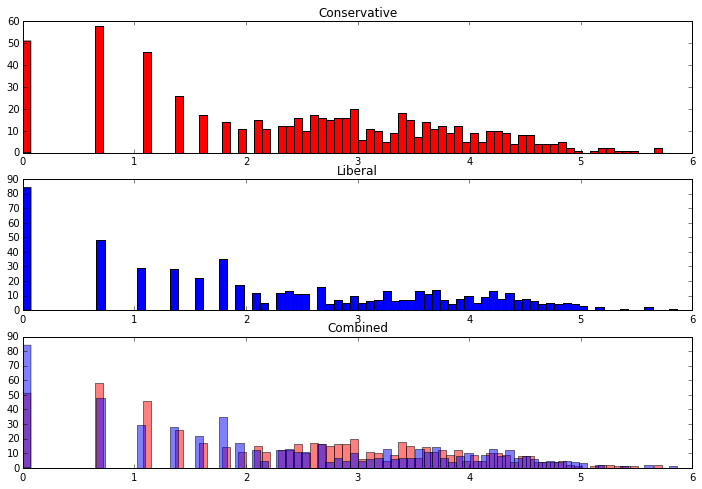

In [34]:
b = 80
fig, ax = plt.subplots(3, 1, figsize=(12, 8))
ax[0].hist([np.log(j) for (i, j) in ds if g.node[i]['value'] == 1], 
           bins=b, color='red')
# ax[0].set_ylim([0, 400])
ax[0].set_title("Conservative")

ax[1].hist([np.log(j) for (i, j) in ds if g.node[i]['value'] == 0], 
           bins=b, color='blue')
# ax[1].set_ylim([0, 400])
ax[1].set_title("Liberal")

ax[2].hist([np.log(j) for (i, j) in ds if g.node[i]['value'] == 1], 
           bins=b, color='red', alpha=0.5)
ax[2].hist([np.log(j) for (i, j) in ds if g.node[i]['value'] == 0], 
           bins=b, color='blue', alpha=0.5)
# ax[2].set_ylim([0, 400])
ax[2].set_title("Combined")

plt.show

These don't really look log normal either. We could calculate a mean and standard deviation of the two distributions, but I think comparing them with a t test becomes more complicated when they are not normal.

I did a little research into this, but was unable to come to any conclusions.

From a qualitative perspective, they look to be very similar.